<a href="https://www.kaggle.com/code/mostafahafez25/car-price-prediction-notebbok?scriptVersionId=119647424" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id='1'></a>
## __1. Import Libraries__

In [1]:
import warnings

import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split , KFold, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error

warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


<a id='2'></a>
## __2. Load and Check Data__

In [2]:
df = pd.read_csv('../input/car-price-prediction/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

* The dataset has <mark>205 rows, 25 columns</mark>.

<a id='3'></a>
## __3. Data Wrangling__

<a id='3.1'></a>
### __3.1 Check Missing Values__

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

* There is <mark>0 Missing Data</mark>.

<a id='3.2'></a>
### __3.2 Check Duplicates__

In [5]:
df.duplicated().sum()

0

* There is <mark>0 Duplicated Data</mark>.

<a id='3.3'></a>
### __3.3 Data Structuring__

<a id='3.3.1'></a>
#### __3.3.1 Standarize Column Names__

In [6]:
df.columns = df.columns.str.lower().str.strip()
df.head()

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<a id='3.3.2'></a>
#### __3.3.2 Drop Unneccessary Data__

In [7]:
df.drop(['car_id'],axis=1,inplace=True)

<a id='3.3.1'></a>
#### __3.3.3 Data Enriching__

In [8]:
df.doornumber.replace({'two':2, 'four':4},inplace=True)
df.cylindernumber.replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12},inplace=True)

* I assume that each car's brand has their own car specification default and their own price range. Let's get each car's brand and check this out. 

In [9]:
df['car_brand']= df.carname.str.split(expand=True)[0]
df.drop('carname', axis=1, inplace=True)
df['car_brand'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_brand, dtype: int64

* Some of the brand names are misspelled or unstructured.

In [10]:
df['car_brand'] = df['car_brand'].replace({'porcshce': 'porsche',
                                                  'Nissan': 'nissan',
                                                  'vokswagen': 'volkswagen',
                                                  'vw' : 'volkswagen',
                                                  'toyouta': 'toyota',
                                                  'maxda': 'mazda'})

In [11]:
df = df.astype({'symboling':'object','doornumber':'object','cylindernumber':'object'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

<a id='4'></a>
## __4. EDA__

In [12]:
df.describe(include='all')

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
count,205.0,205,205,205.0,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205.0,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205
unique,6.0,2,2,2.0,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7.0,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,0.0,gas,std,4.0,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,4.0,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toyota
freq,67.0,185,168,115.0,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159.0,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,NaN


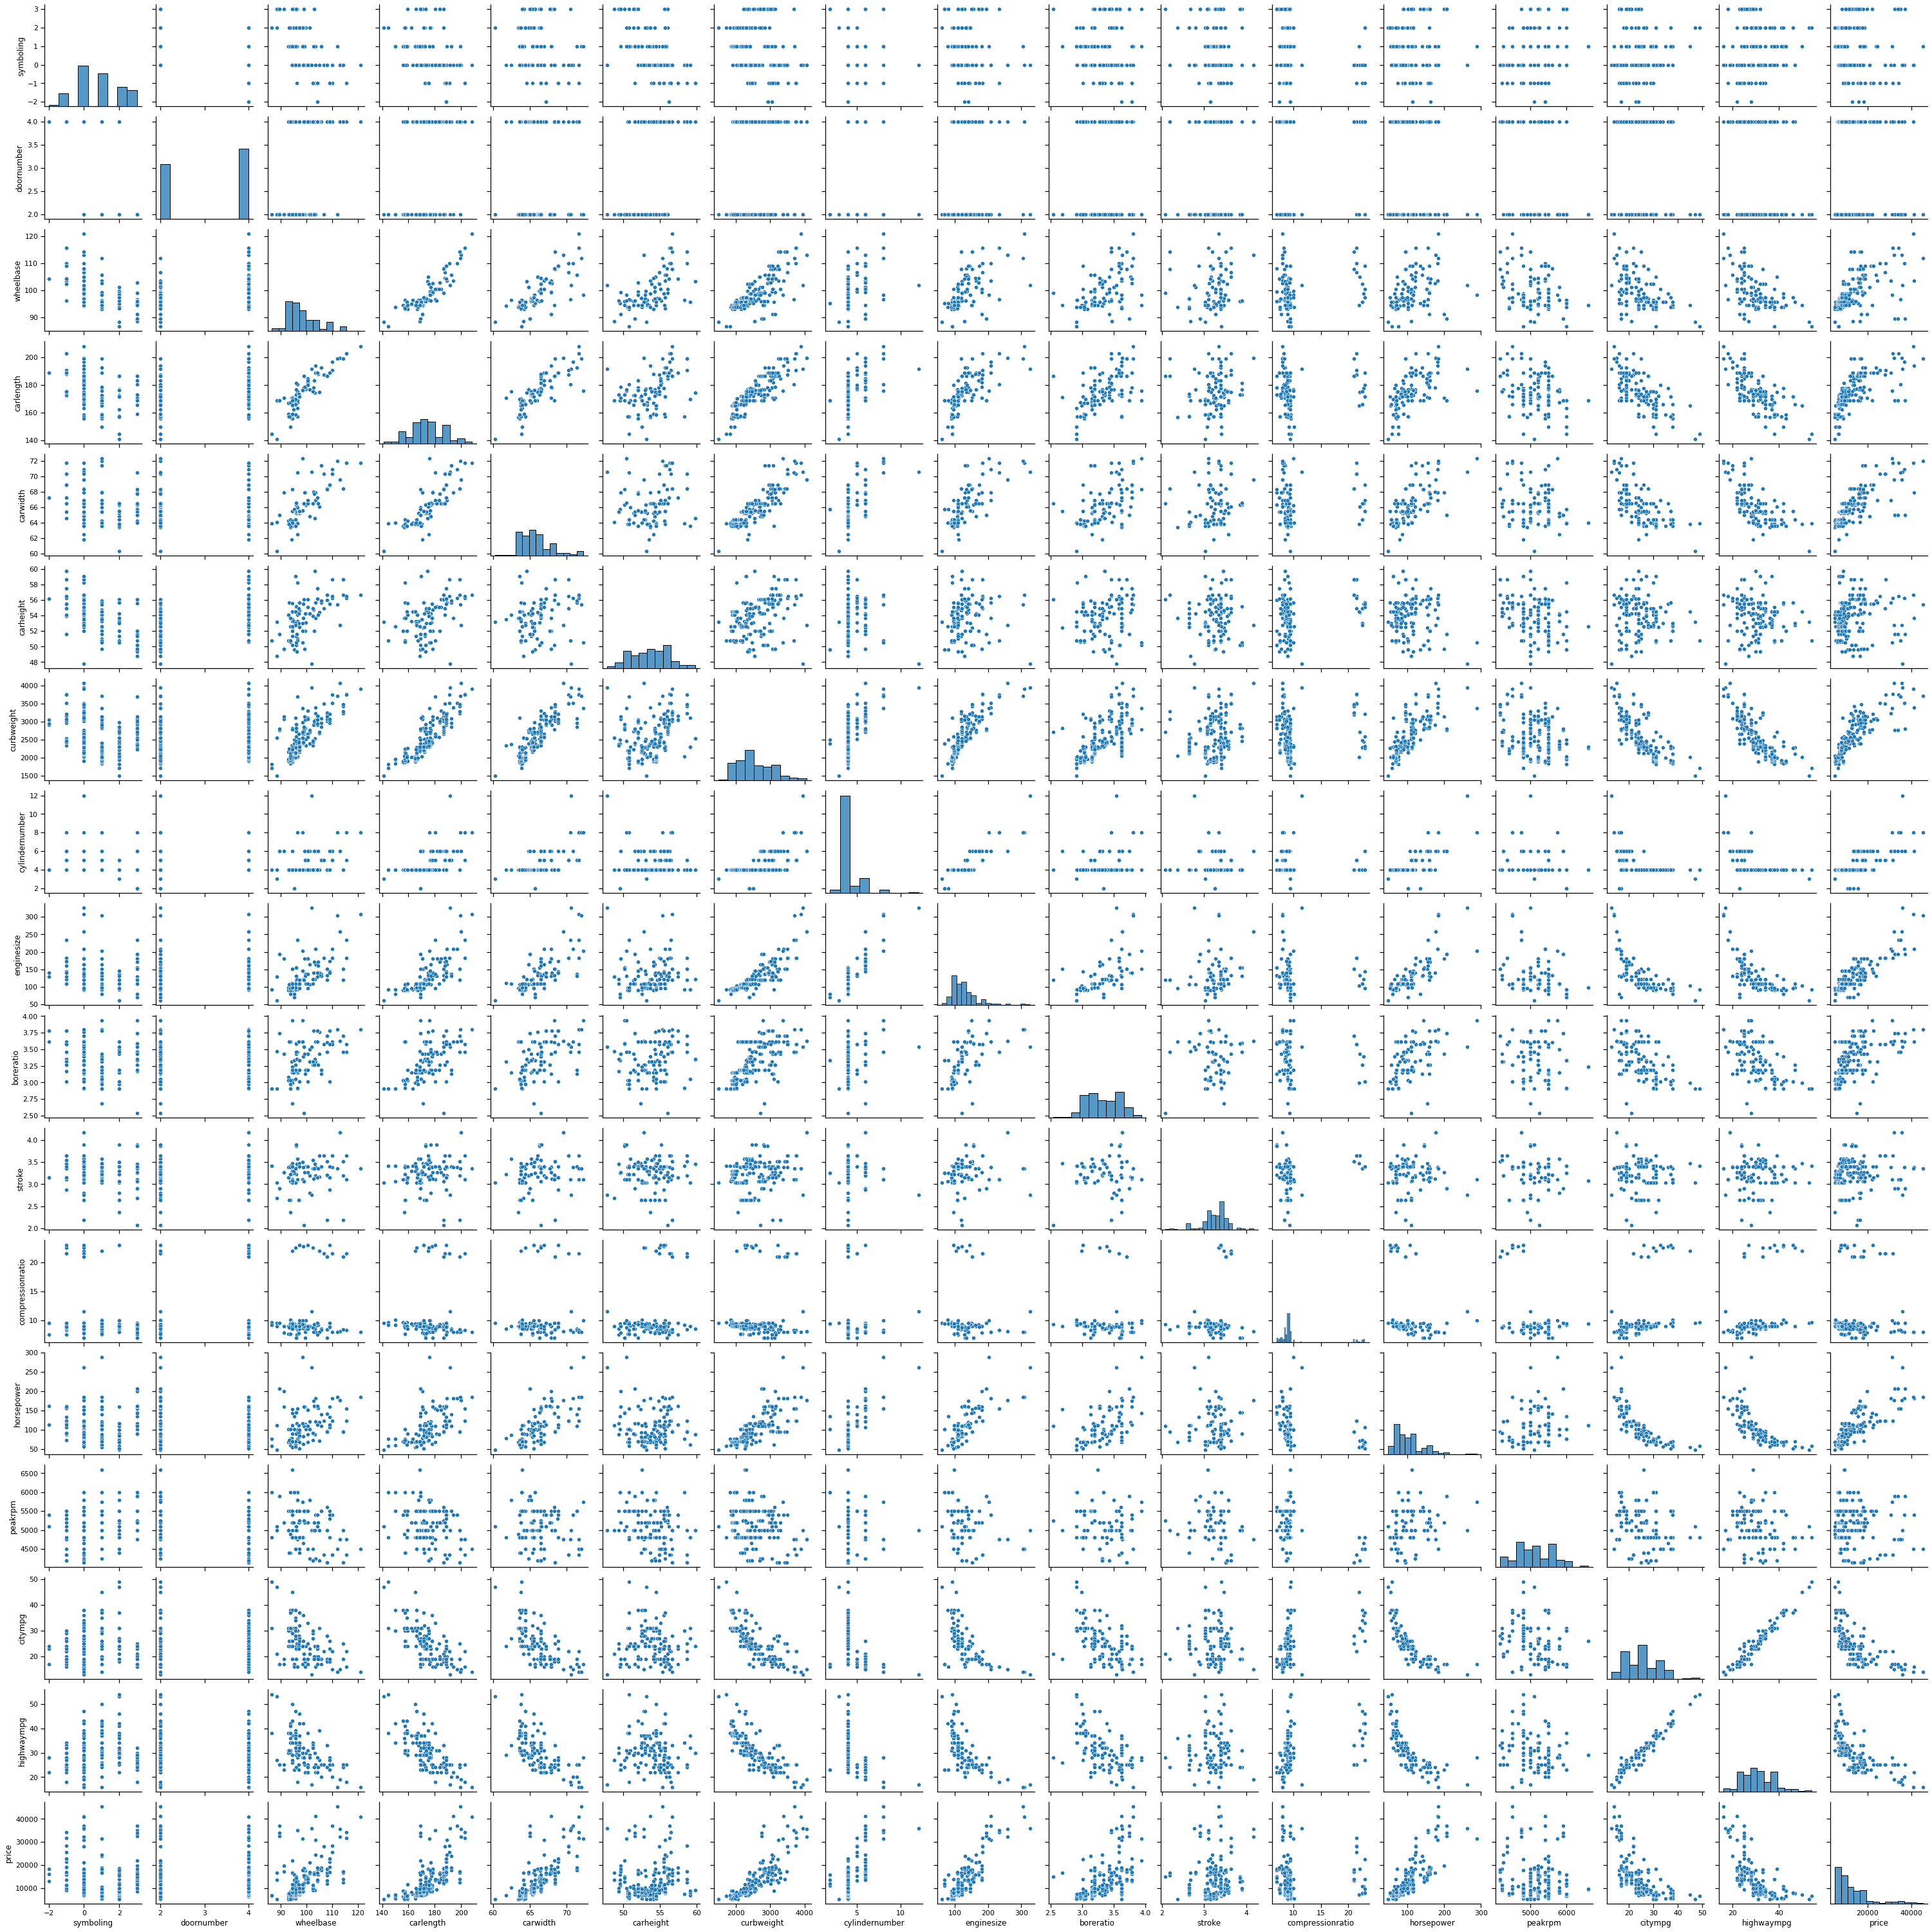

In [13]:
sns.set_context("notebook")
sns.pairplot(df);

<a id='4.1'></a>
### __4.1 Checking Count of Car Brands__

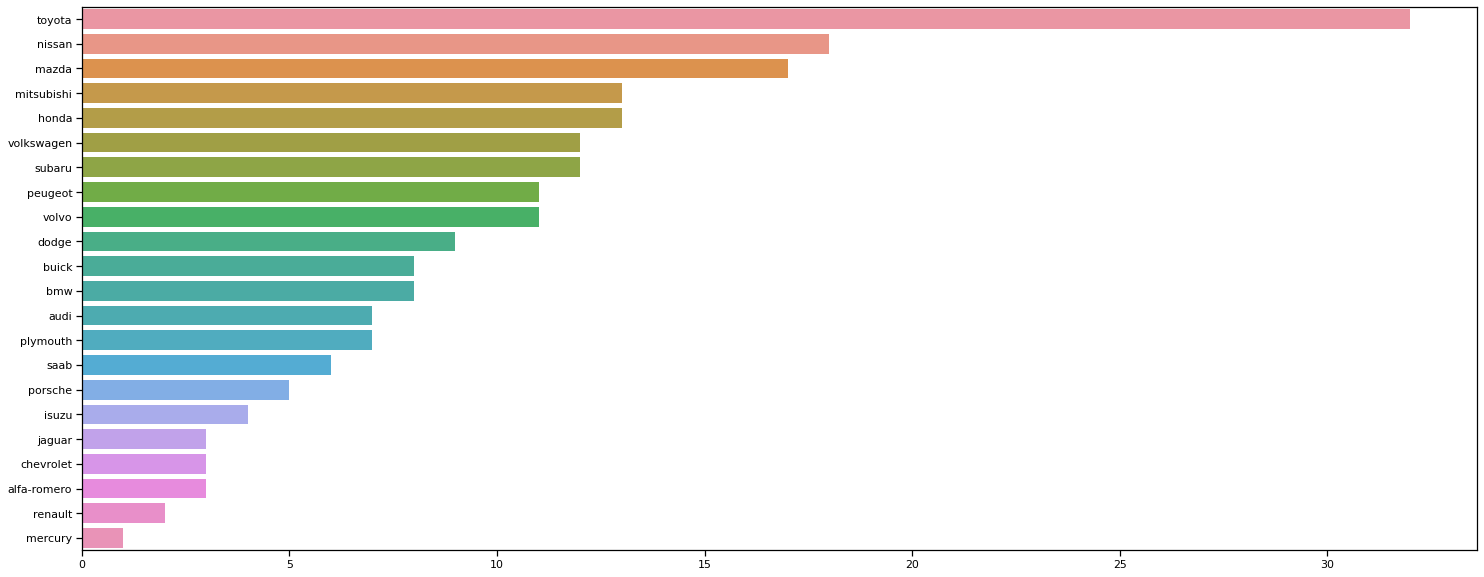

In [14]:
plt.figure(figsize=(25,10))
sns.set_context("notebook")
cb = df.car_brand.value_counts()
sns.barplot(x=cb.values, y=cb.index ,orient='h');

* <mark>Toyota</mark> brand has the highest car count more than 30 cars.
* <mark>Mercury</mark> brand has just 1 car.

In [15]:
df.loc[df.car_brand == 'mercury']

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
75,1,gas,turbo,2,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,4,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0,mercury


<a id='4.2'></a>
### __4.2 Checking Relation between Car Brand and Price__

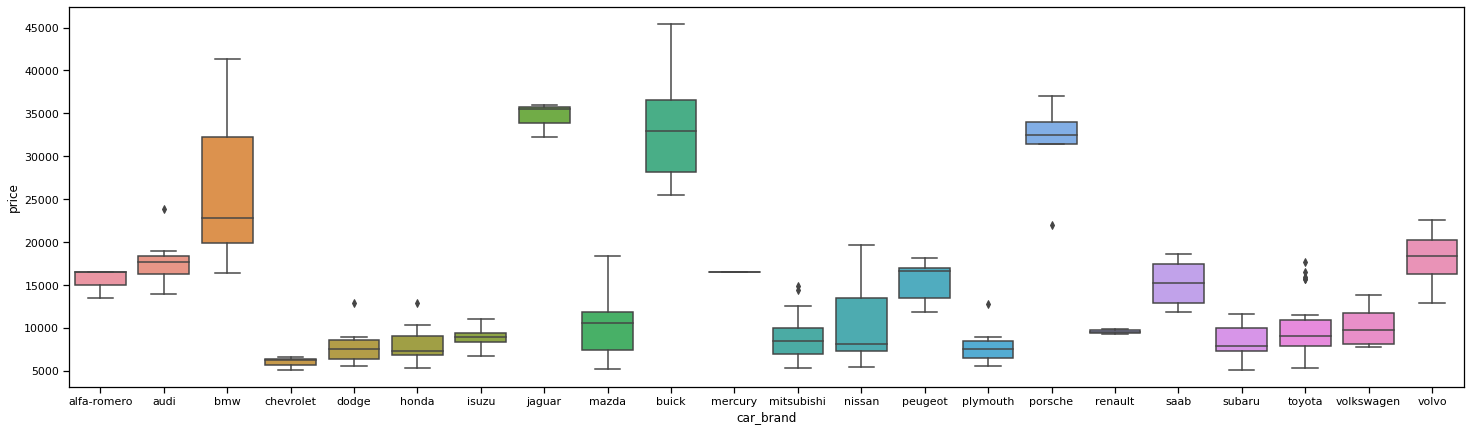

In [16]:
plt.figure(figsize=(25,7))
sns.set_context("notebook")
sns.boxplot(x=df.car_brand, y=df.price)
plt.show();

* <mark>Porsche, Buick, Jaguar, BMW</mark> have the highest price ranges.
* <mark>BMW</mark> prices has the biggest range of prices starting at almost 16k till almost 42K. 

<a id='4.3'></a>
### __4.3 Checking Relation between Number of Cylinders and Price__

In [17]:
df.cylindernumber.value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

* The data is <mark>Cylinder 4</mark> biased.
* <mark>Cylinder 3 and 12</mark> each has 1 car in the dataset.

In [18]:
df.loc[df.cylindernumber == 12]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
49,0,gas,std,2,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,12,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0,jaguar


In [19]:
df.loc[df.cylindernumber == 3]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
18,2,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,3,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0,chevrolet


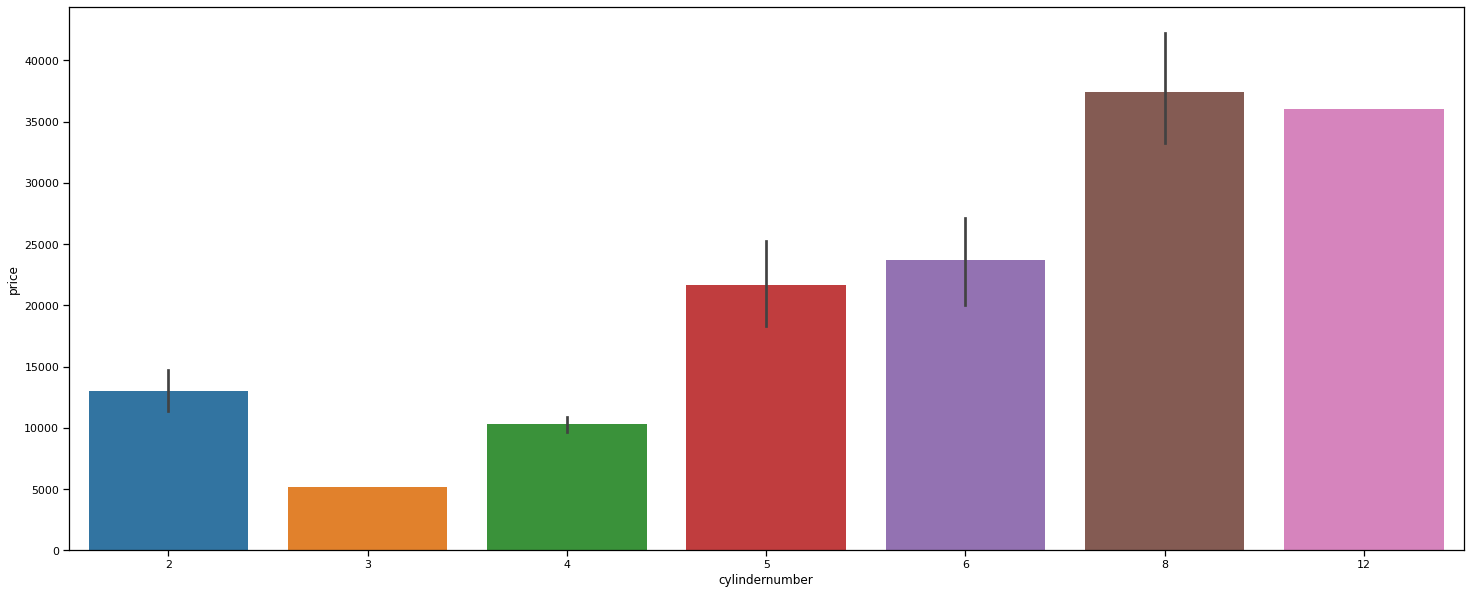

In [20]:
plt.figure(figsize=(25,10))
sns.set_context("notebook")
sns.barplot(x=df.cylindernumber, y=df.price)
plt.show();

* As the number of cylinders increased the price increased.

<a id='4.4'></a>
### __4.4 Checking Relation between Number of Cylinders , Engine Size and Price__

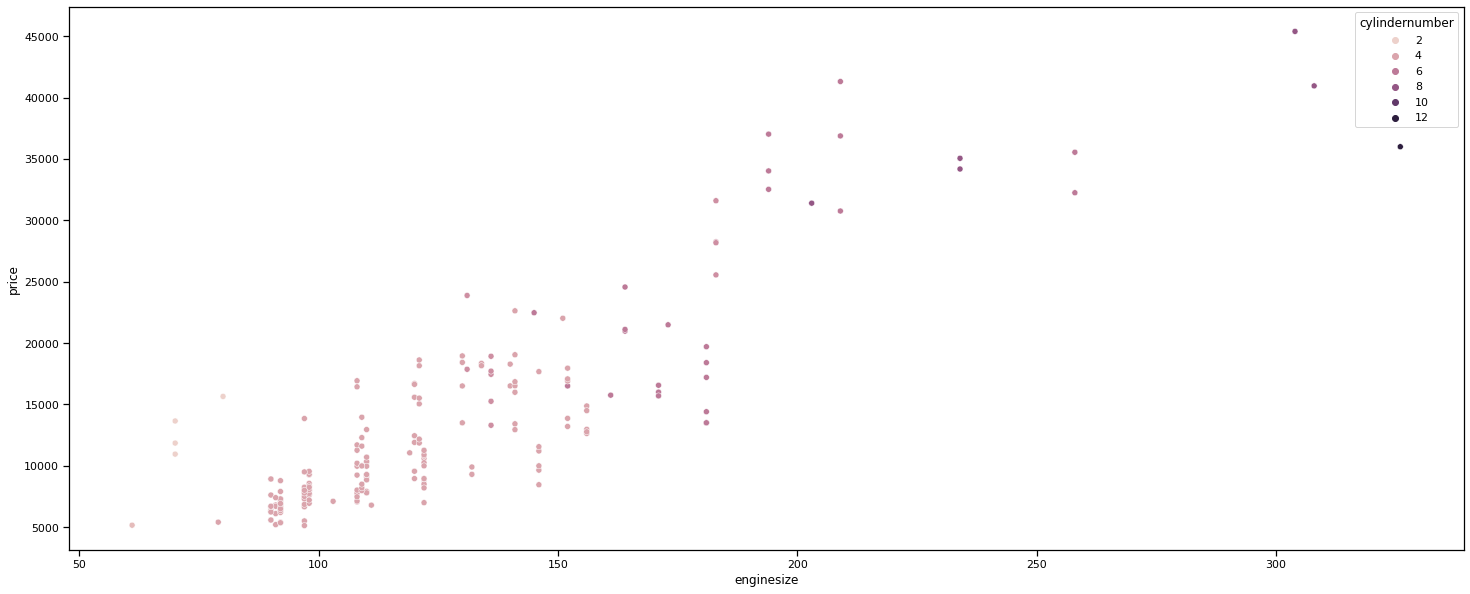

In [21]:
plt.figure(figsize=(25,10))
sns.set_context("notebook")
sns.scatterplot(x=df.enginesize, y=df.price, hue=df.cylindernumber);

* The <mark>cylinder number</mark> increase as the <mark>engine size</mark> increase.

<a id='4.4'></a>
### __4.4 Checking Relation between Fuel System, Engine Size and Price__

In [22]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

* <mark>MPFI fuel systems</mark> has the highest count of cars.
* The dataset has 1 car for each <mark>MFI and SPFI fuel systems</mark>.

In [23]:
df.loc[df.fuelsystem == 'mfi']

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
29,3,gas,turbo,2,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,4,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964.0,dodge


In [24]:
df.loc[df.fuelsystem == 'spfi']

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
46,2,gas,std,2,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,4,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0,isuzu


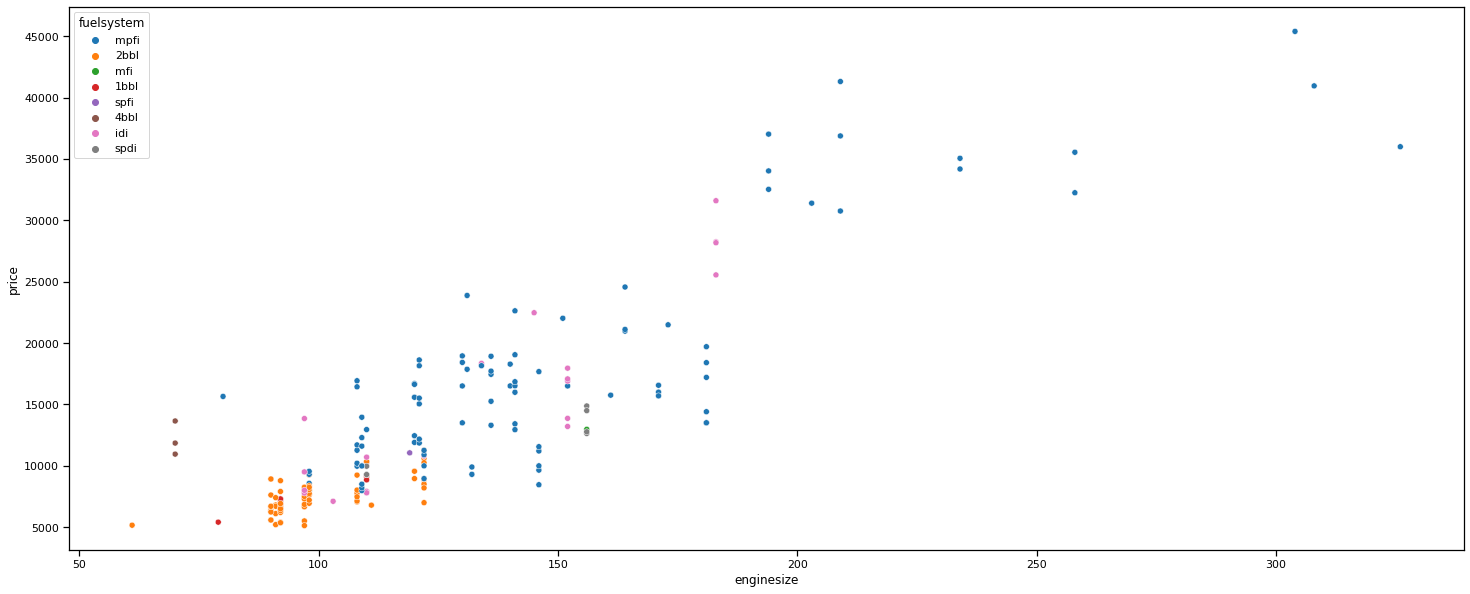

In [25]:
plt.figure(figsize=(25,10))
sns.set_context("notebook")
sns.scatterplot(x=df.enginesize, y=df.price, hue=df.fuelsystem);

* <mark>4BBL fuel systems</mark> has the smallest engine size.
* <mark>2BBL fuel systems</mark> has the lowest price.

<a id='4.4'></a>
### __4.4 Checking Relation between Fuel System, Car Brand and Price__

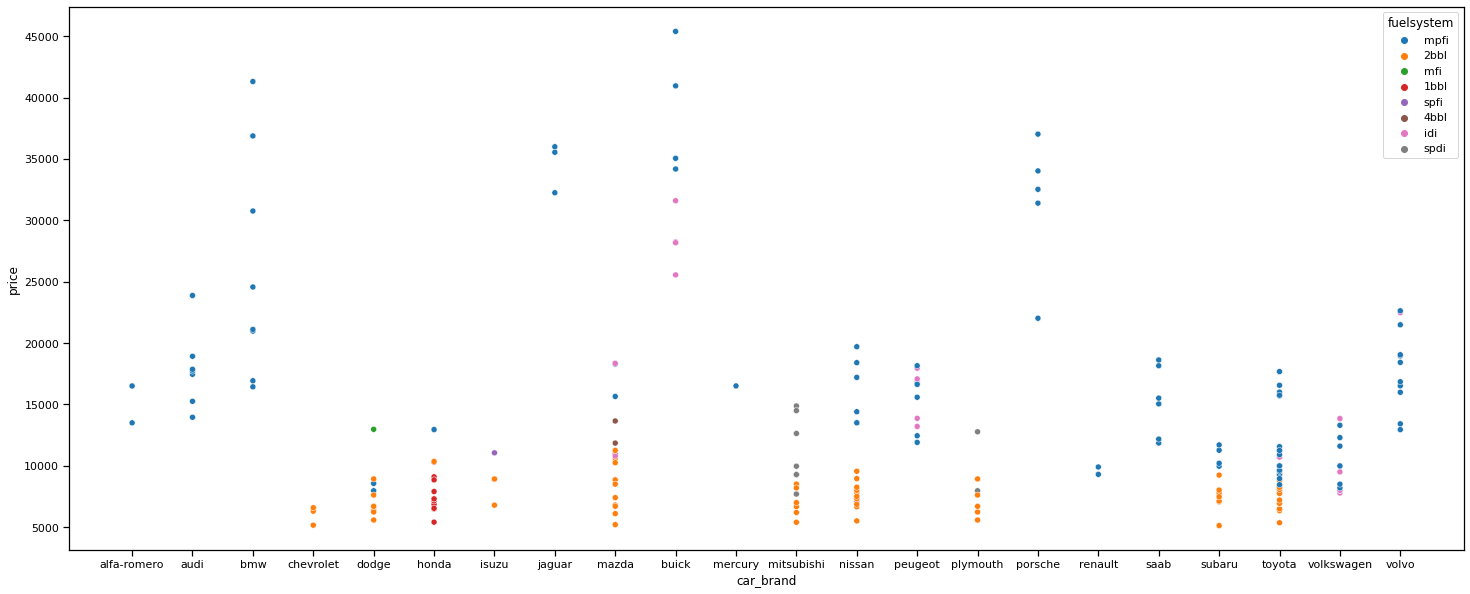

In [26]:
plt.figure(figsize=(25,10))
sns.set_context("notebook")
sns.scatterplot(x=df.car_brand, y=df.price, hue=df.fuelsystem);

In [27]:
df.loc[df.fuelsystem == '1bbl']

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
30,2,gas,std,2,hatchback,fwd,front,86.6,144.6,63.9,50.8,1713,ohc,4,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479.0,honda
31,2,gas,std,2,hatchback,fwd,front,86.6,144.6,63.9,50.8,1819,ohc,4,92,1bbl,2.91,3.41,9.2,76,6000,31,38,6855.0,honda
32,1,gas,std,2,hatchback,fwd,front,93.7,150.0,64.0,52.6,1837,ohc,4,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399.0,honda
33,1,gas,std,2,hatchback,fwd,front,93.7,150.0,64.0,52.6,1940,ohc,4,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529.0,honda
34,1,gas,std,2,hatchback,fwd,front,93.7,150.0,64.0,52.6,1956,ohc,4,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129.0,honda
35,0,gas,std,4,sedan,fwd,front,96.5,163.4,64.0,54.5,2010,ohc,4,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7295.0,honda
36,0,gas,std,4,wagon,fwd,front,96.5,157.1,63.9,58.3,2024,ohc,4,92,1bbl,2.92,3.41,9.2,76,6000,30,34,7295.0,honda
37,0,gas,std,2,hatchback,fwd,front,96.5,167.5,65.2,53.3,2236,ohc,4,110,1bbl,3.15,3.58,9.0,86,5800,27,33,7895.0,honda
38,0,gas,std,2,hatchback,fwd,front,96.5,167.5,65.2,53.3,2289,ohc,4,110,1bbl,3.15,3.58,9.0,86,5800,27,33,9095.0,honda
39,0,gas,std,4,sedan,fwd,front,96.5,175.4,65.2,54.1,2304,ohc,4,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845.0,honda


* <mark>1BBL fuel system</mark> are all Honda Brand.

<a id='4.5'></a>
### __4.5 Checking Relation between Engine Type, Engine Size and Price__

In [28]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

* The dataset is <mark>OHC engine type</mark> biased.
* The dataset has 1 car with <mark>DOHCV engine type</mark>.

In [29]:
df.loc[df.enginetype == 'dohcv']

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
129,1,gas,std,2,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,8,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5,porsche


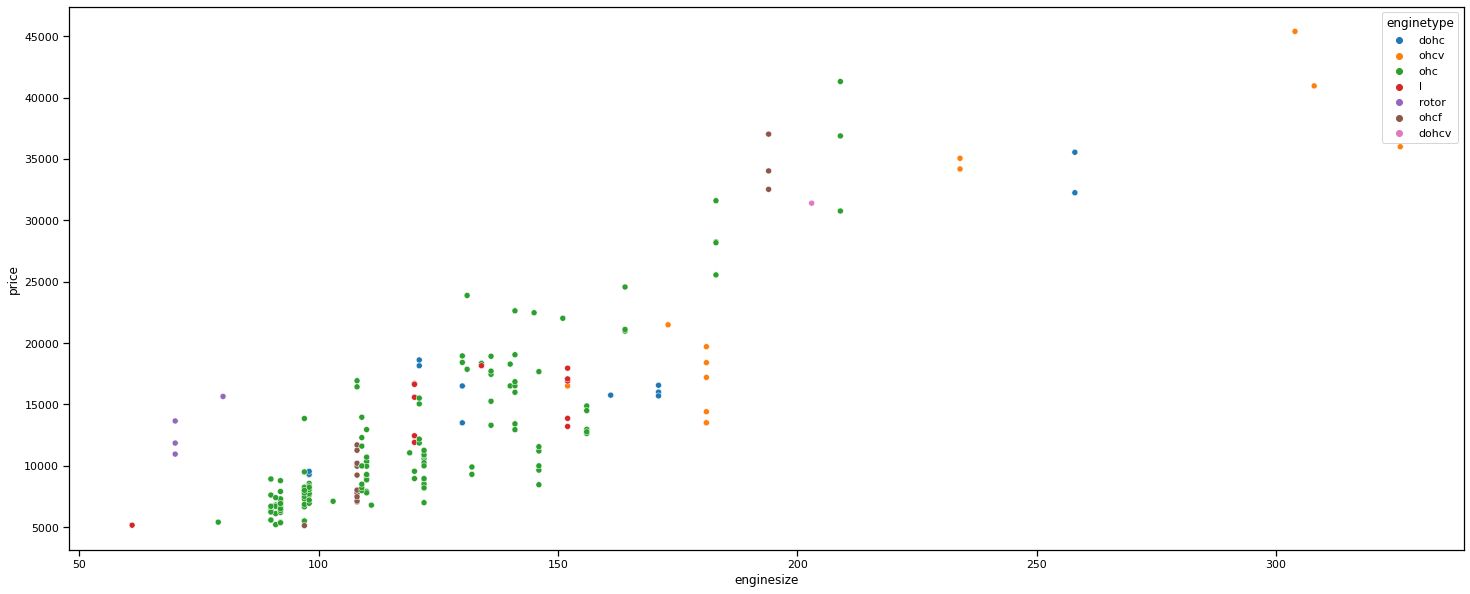

In [30]:
plt.figure(figsize=(25,10))
sns.set_context("notebook")
sns.scatterplot(x=df.enginesize, y=df.price, hue=df.enginetype);

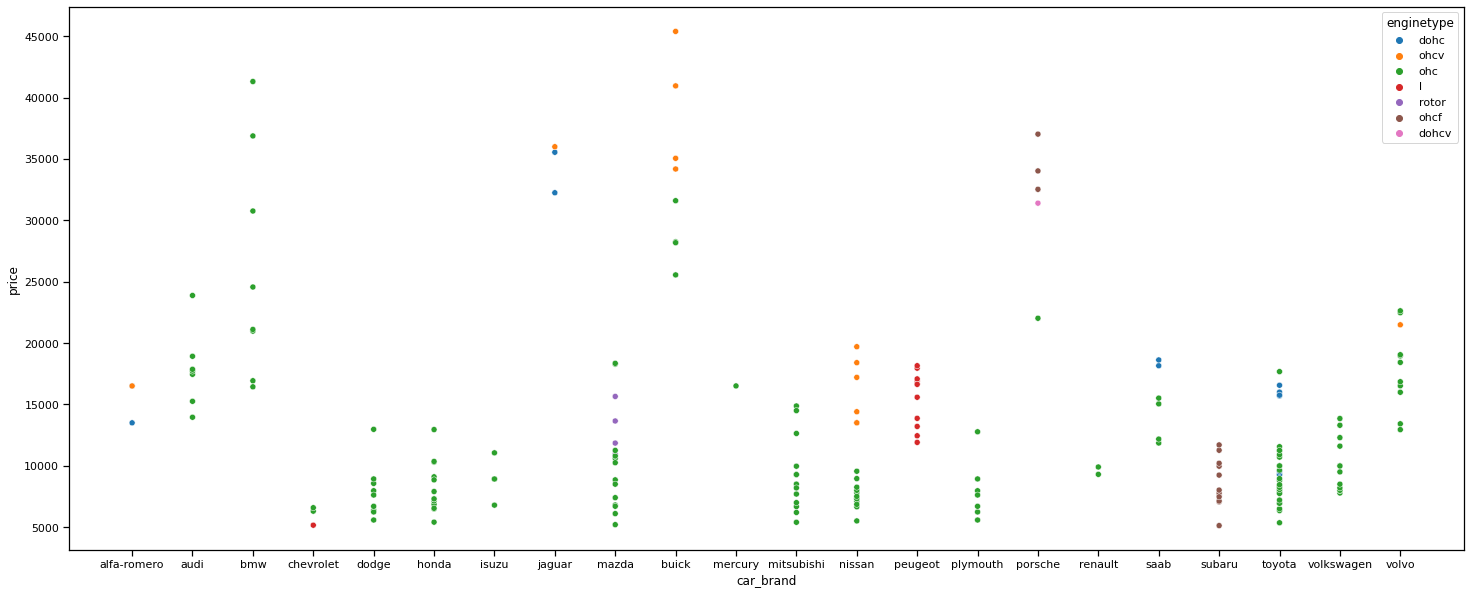

In [31]:
plt.figure(figsize=(25,10))
sns.set_context("notebook")
sns.scatterplot(x=df.car_brand, y=df.price, hue=df.enginetype);

In [32]:
df.loc[df.enginetype == 'ohcf'].sort_values('enginesize')

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
138,2,gas,std,2,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,4,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0,subaru
139,2,gas,std,2,hatchback,fwd,front,93.7,157.9,63.6,53.7,2120,ohcf,4,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7053.0,subaru
140,2,gas,std,2,hatchback,4wd,front,93.3,157.3,63.8,55.7,2240,ohcf,4,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7603.0,subaru
141,0,gas,std,4,sedan,fwd,front,97.2,172.0,65.4,52.5,2145,ohcf,4,108,2bbl,3.62,2.64,9.5,82,4800,32,37,7126.0,subaru
142,0,gas,std,4,sedan,fwd,front,97.2,172.0,65.4,52.5,2190,ohcf,4,108,2bbl,3.62,2.64,9.5,82,4400,28,33,7775.0,subaru
143,0,gas,std,4,sedan,fwd,front,97.2,172.0,65.4,52.5,2340,ohcf,4,108,mpfi,3.62,2.64,9.0,94,5200,26,32,9960.0,subaru
144,0,gas,std,4,sedan,4wd,front,97.0,172.0,65.4,54.3,2385,ohcf,4,108,2bbl,3.62,2.64,9.0,82,4800,24,25,9233.0,subaru
145,0,gas,turbo,4,sedan,4wd,front,97.0,172.0,65.4,54.3,2510,ohcf,4,108,mpfi,3.62,2.64,7.7,111,4800,24,29,11259.0,subaru
146,0,gas,std,4,wagon,fwd,front,97.0,173.5,65.4,53.0,2290,ohcf,4,108,2bbl,3.62,2.64,9.0,82,4800,28,32,7463.0,subaru
147,0,gas,std,4,wagon,fwd,front,97.0,173.5,65.4,53.0,2455,ohcf,4,108,mpfi,3.62,2.64,9.0,94,5200,25,31,10198.0,subaru


* OHCF engine type that has engine size of 194 are <mark>Porsche brand cars</mark>.
* OHCF engine type that has an average engine size of 100 are <mark>Subaru brand cars</mark>.

In [33]:
df.loc[df.enginetype == 'l'].sort_values('enginesize')

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
18,2,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,3,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0,chevrolet
107,0,gas,std,4,sedan,rwd,front,107.9,186.7,68.4,56.7,3020,l,4,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900.0,peugeot
109,0,gas,std,4,wagon,rwd,front,114.2,198.9,68.4,58.7,3230,l,4,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440.0,peugeot
111,0,gas,std,4,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,4,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0,peugeot
113,0,gas,std,4,wagon,rwd,front,114.2,198.9,68.4,56.7,3285,l,4,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0,peugeot
115,0,gas,std,4,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,4,120,mpfi,3.46,3.19,8.4,97,5000,19,24,16630.0,peugeot
117,0,gas,turbo,4,sedan,rwd,front,108.0,186.7,68.3,56.0,3130,l,4,134,mpfi,3.61,3.21,7.0,142,5600,18,24,18150.0,peugeot
108,0,diesel,turbo,4,sedan,rwd,front,107.9,186.7,68.4,56.7,3197,l,4,152,idi,3.70,3.52,21.0,95,4150,28,33,13200.0,peugeot
110,0,diesel,turbo,4,wagon,rwd,front,114.2,198.9,68.4,58.7,3430,l,4,152,idi,3.70,3.52,21.0,95,4150,25,25,13860.0,peugeot
112,0,diesel,turbo,4,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,4,152,idi,3.70,3.52,21.0,95,4150,28,33,16900.0,peugeot


* L engine type that has engine sizes between 120 and 152 are <mark>Peugeot brand cars</mark>.
* L engine type that has a engine size of 61 are <mark>Chevrolet brand cars</mark>.

In [34]:
df.loc[df.enginetype == 'rotor']

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
55,3,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0,mazda
56,3,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0,mazda
57,3,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2,70,4bbl,3.33,3.255,9.4,101,6000,17,23,13645.0,mazda
58,3,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2,80,mpfi,3.33,3.255,9.4,135,6000,16,23,15645.0,mazda


* ROTOR engine type that are <mark>Mazda brand cars</mark>.


<a id='4.6'></a>
### __4.6 Checking Relation between Engine Type, Engine Location and Price__

In [35]:
df.loc[df.enginelocation == 'rear']

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
126,3,gas,std,2,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,6,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0,porsche
127,3,gas,std,2,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,6,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0,porsche
128,3,gas,std,2,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,6,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0,porsche


* Rear engine cars are all <mark>Porsche brand cars</mark>.

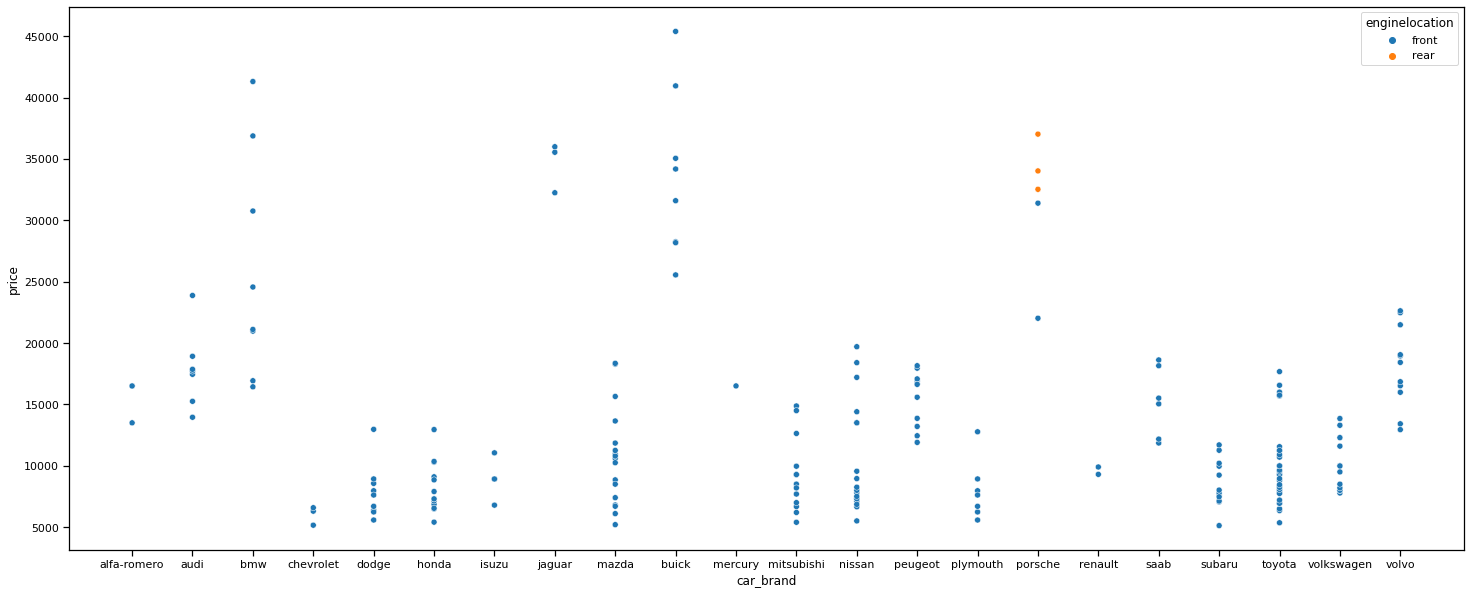

In [36]:
plt.figure(figsize=(25,10))
sns.set_context("notebook")
sns.scatterplot(x=df.car_brand, y=df.price, hue=df.enginelocation);

<a id='4.7'></a>
### __4.7 Checking Relation between Engine Type, Driving Wheel and Price__

In [37]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

* <mark>Most of the cars in the dataset are forward wheel driving.</mark>

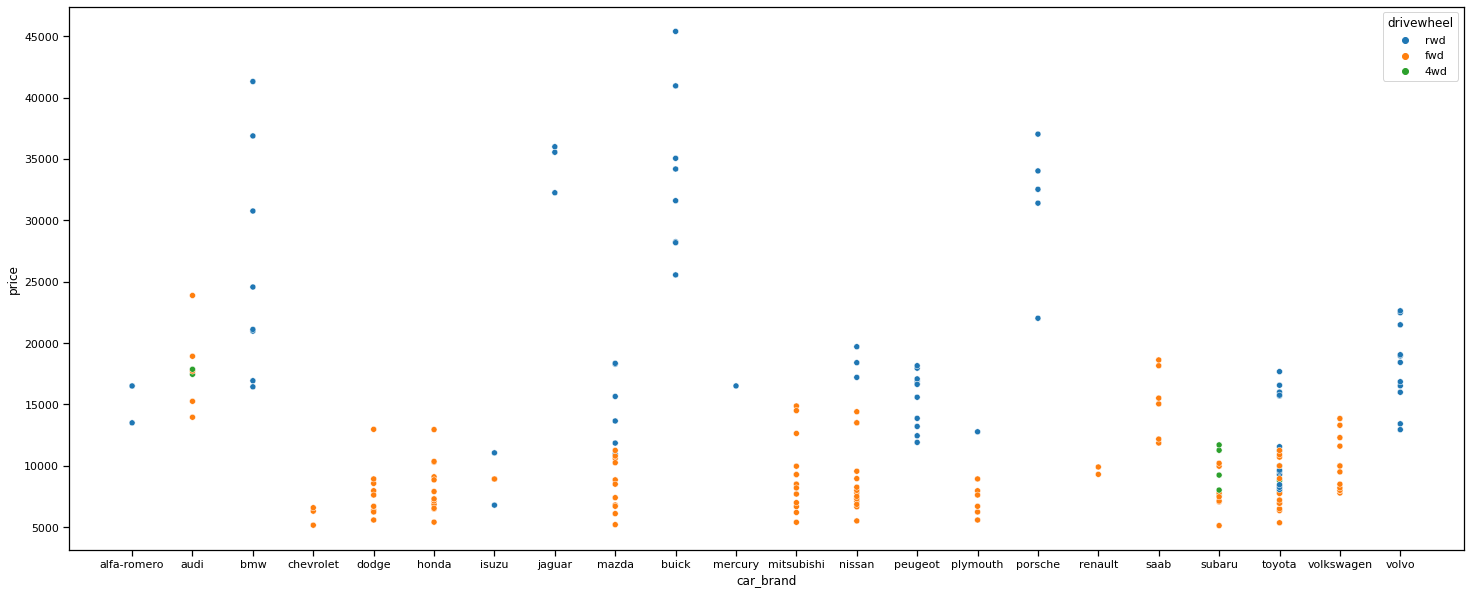

In [38]:
plt.figure(figsize=(25,10))
sns.set_context("notebook")
sns.scatterplot(x=df.car_brand, y=df.price, hue=df.drivewheel);

<a id='4.8'></a>
### __4.8 Checking Relation between Engine Type, Aspiration and Price__

In [39]:
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

* <mark>Most of the cars in the dataset has std aspiration.</mark>

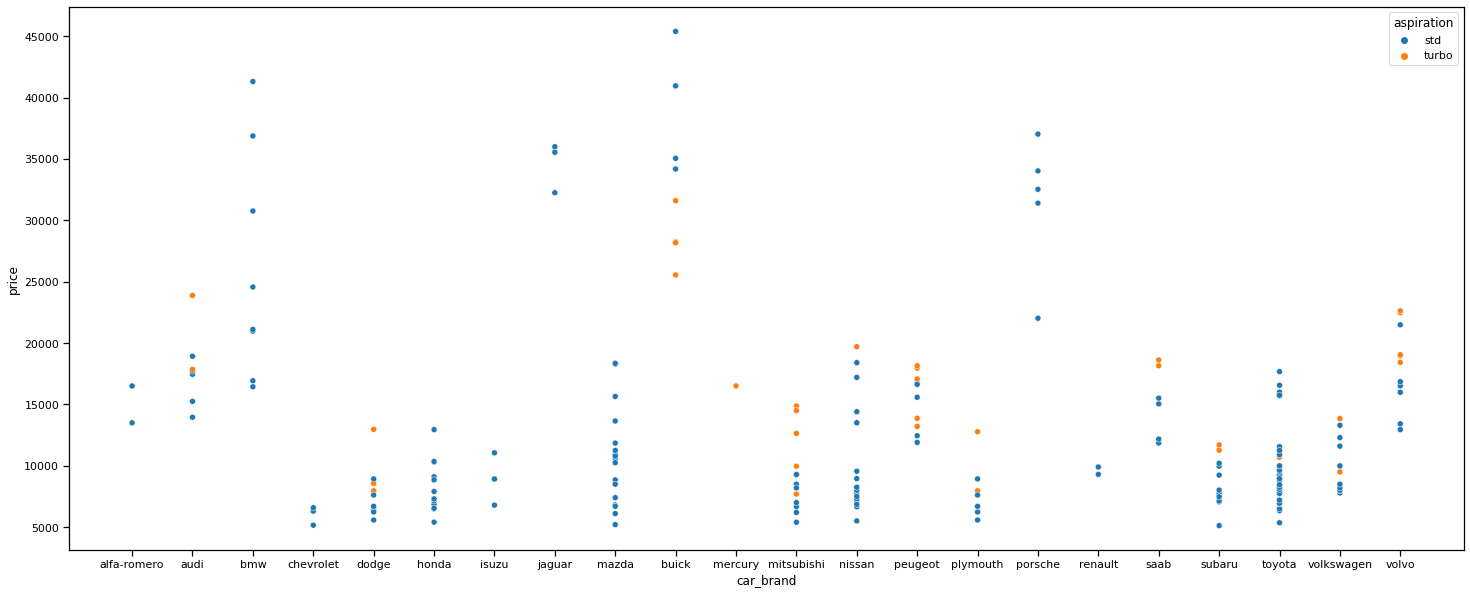

In [40]:
plt.figure(figsize=(25,10))
sns.set_context("notebook")
sns.scatterplot(x=df.car_brand, y=df.price, hue=df.aspiration);

<a id='4.9'></a>
### __4.9 Checking Relation between Engine Type, Door Number and Price__

In [41]:
df.doornumber.value_counts()

4    115
2     90
Name: doornumber, dtype: int64

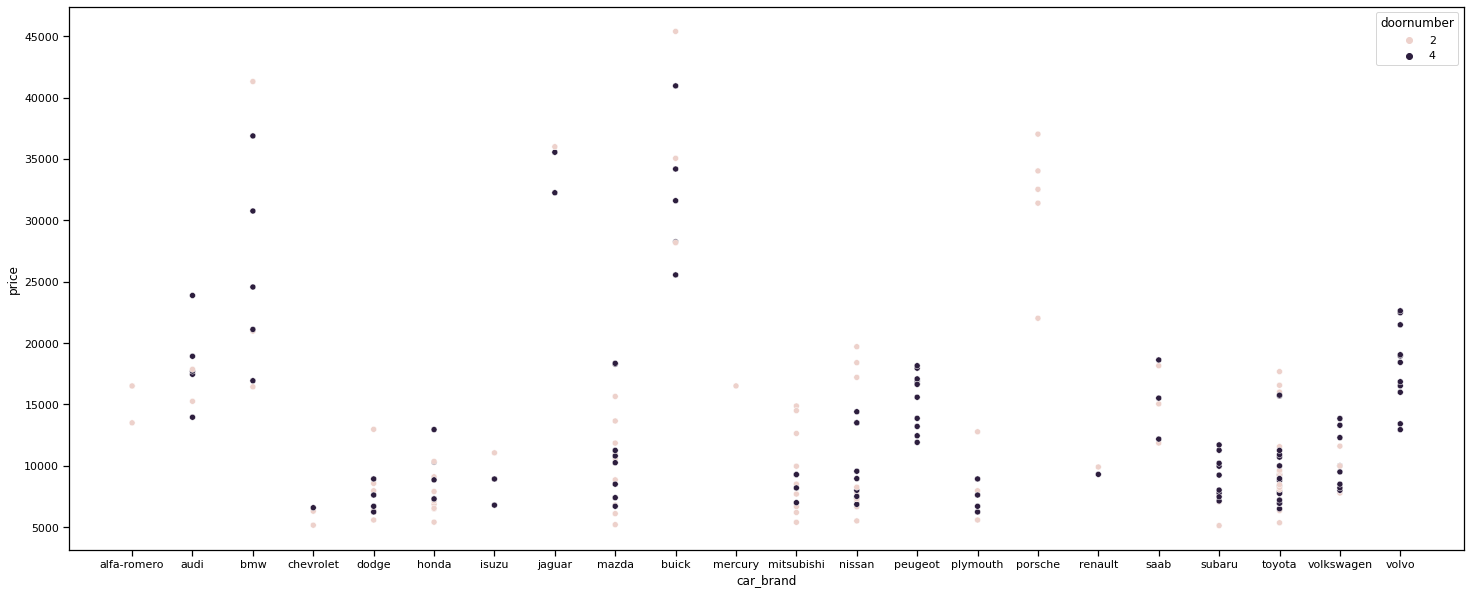

In [42]:
plt.figure(figsize=(25,10))
sns.set_context("notebook")
sns.scatterplot(x=df.car_brand, y=df.price, hue=df.doornumber);

<a id='4.9'></a>
### __4.9 Checking Relation between Engine Type, Feul Type and Price__

In [43]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

* <mark>Most cars in the dataset uses gas as their feul type.</mark>

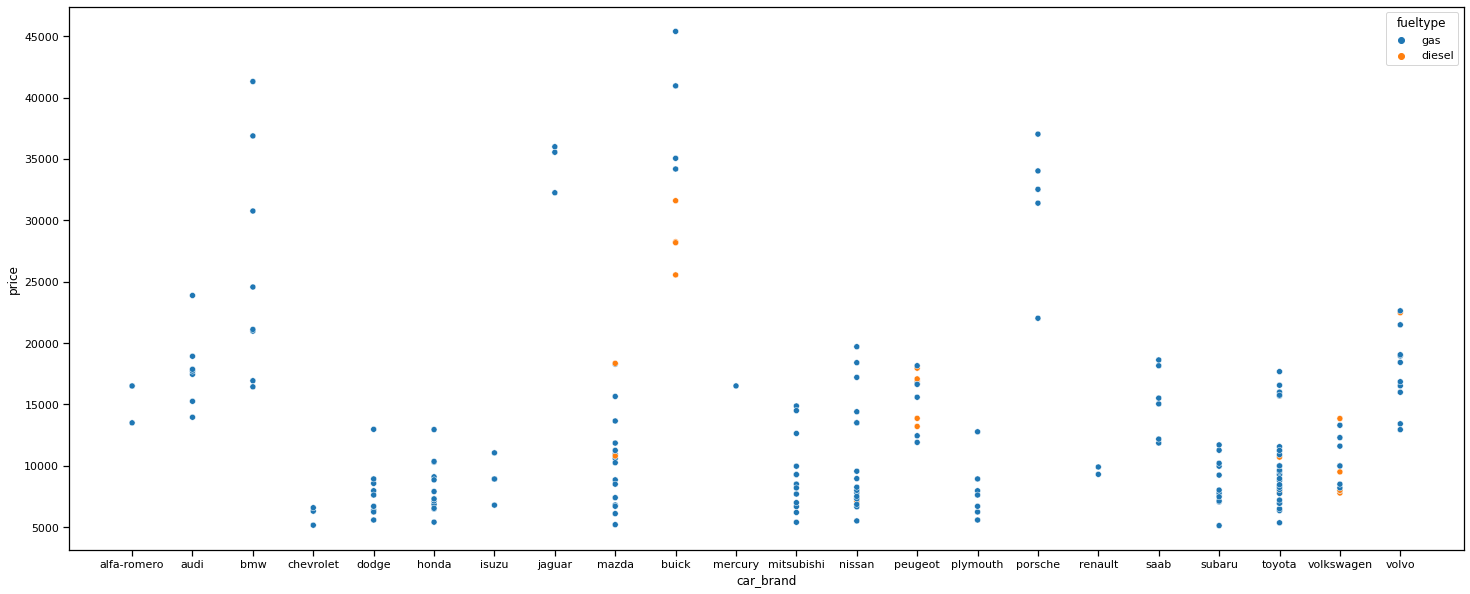

In [44]:
plt.figure(figsize=(25,10))
sns.set_context("notebook")
sns.scatterplot(x=df.car_brand, y=df.price, hue=df.fueltype);

<a id='5'></a>
## __5. Feature Engineering__

<a id='5.1'></a>
### __5.1 Catagorical Features__

In [45]:
cat = df.columns[df.dtypes == np.object]
df_cat = df[cat]
df_cat.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_brand
0,3,gas,std,2,convertible,rwd,front,dohc,4,mpfi,alfa-romero
1,3,gas,std,2,convertible,rwd,front,dohc,4,mpfi,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,alfa-romero
3,2,gas,std,4,sedan,fwd,front,ohc,4,mpfi,audi
4,2,gas,std,4,sedan,4wd,front,ohc,5,mpfi,audi


In [46]:
df_cat.describe(include='all')

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_brand
count,205,205,205,205,205,205,205,205,205,205,205
unique,6,2,2,2,5,3,2,7,7,8,22
top,0,gas,std,4,sedan,fwd,front,ohc,4,mpfi,toyota
freq,67,185,168,115,96,120,202,148,159,94,32


<a id='5.1.1'></a>
#### __5.1.1 Catagorical Data Encoding__

In [47]:
cat_col= ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'car_brand']
df_cat = pd.get_dummies(df_cat, prefix=cat_col, columns=cat_col, drop_first=True)
df_cat

,symboling,doornumber,cylindernumber,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_brand_audi,car_brand_bmw,car_brand_buick,car_brand_chevrolet,car_brand_dodge,car_brand_honda,car_brand_isuzu,car_brand_jaguar,car_brand_mazda,car_brand_mercury,car_brand_mitsubishi,car_brand_nissan,car_brand_peugeot,car_brand_plymouth,car_brand_porsche,car_brand_renault,car_brand_saab,car_brand_subaru,car_brand_toyota,car_brand_volkswagen,car_brand_volvo
0,3,2,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,2,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,6,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,4,4,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,4,5,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,4,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,-1,4,4,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,-1,4,6,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203,-1,4,6,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<a id='5.2'></a>
### __5.2 Numerical Features__

In [48]:
num = df.columns[~df.columns.isin(cat)]
df_num = df[num]
df_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [49]:
df_num.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<a id='5.2.1'></a>
#### __5.2.1 Fitting Numerical Values Distribution__

COMPRESSIONRATIO skewness: 0.007967507552816878 ; Fitted Lambda: -3.0701036111613083
ENGINESIZE skewness: -0.0031660395891493515 ; Fitted Lambda: -0.9617338982169858
PRICE skewness: 0.09346385309949919 ; Fitted Lambda: -0.6280809555716815
HORSEPOWER skewness: 0.048008796549781754 ; Fitted Lambda: -0.604574799202489
WHEELBASE skewness: -0.00428933276607974 ; Fitted Lambda: -5.069774018826096
CARWIDTH skewness: 0.0 ; Fitted Lambda: -8.479840937781395
STROKE skewness: 0.11913861608401972 ; Fitted Lambda: 2.511511600839133
CURBWEIGHT skewness: 0.024670111862339895 ; Fitted Lambda: -0.6006007081957044
CITYMPG skewness: 0.00018662089819087714 ; Fitted Lambda: -0.004858542484576192
HIGHWAYMPG skewness: -0.0005720465247904252 ; Fitted Lambda: 0.18308918978048283
CARLENGTH skewness: -0.0004312899222344472 ; Fitted Lambda: 0.22708805910105995
PEAKRPM skewness: -0.0008814031742364743 ; Fitted Lambda: 0.7293978621720419
CARHEIGHT skewness: -0.002763166772622775 ; Fitted Lambda: 0.3647226955313294


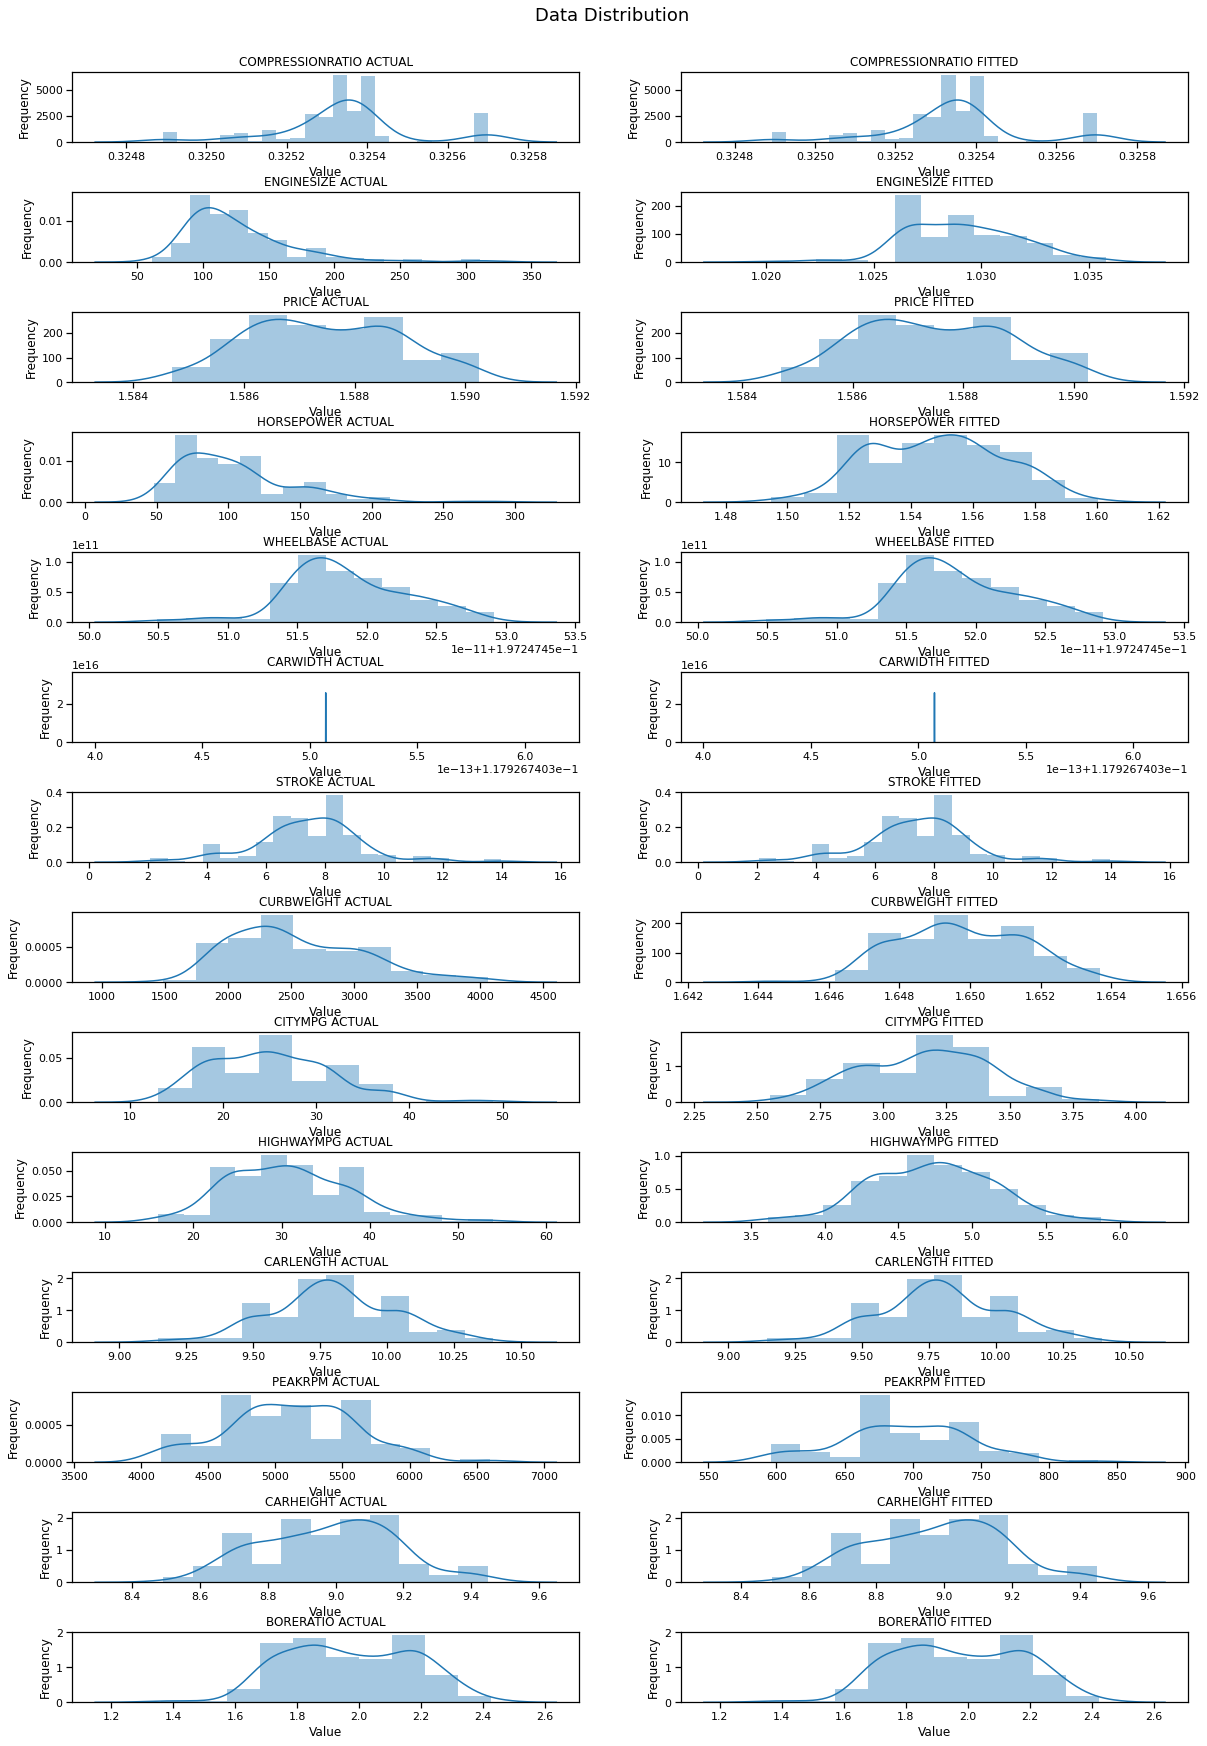

In [50]:
sk = (df_num.skew().abs().sort_values(ascending=False) > 0.05).index.tolist()

fig, ax = plt.subplots(len(sk),2, figsize=(20, 30))
fig.suptitle('Data Distribution', fontsize=18, y=0.91)
plt.subplots_adjust(hspace=0.7)
for i, col in enumerate(sk):
    
    
    actual_data = df_num[col]
    fitted_data, fitted_lamnda = stats.boxcox(df_num[col])
    df_num[col] = fitted_data

    sns.distplot(actual_data, hist=True, kde=True, label="Actual Distribution", ax=ax[i,0])
    sns.distplot(fitted_data, hist=True, kde=True, label="Normal Distribution", ax=ax[i,1])
    #plt.legend(loc = 'upper right')
    ax[i,0].set(title =(col.upper() + ' ACTUAL'), xlabel='Value', ylabel='Frequency')
    ax[i,1].set(title =(col.upper() + ' FITTED'), xlabel='Value', ylabel='Frequency')

    print(f'{col.upper()} skewness: {stats.skew(fitted_data)} ; Fitted Lambda: {fitted_lamnda}')
    
plt.show()

In [51]:
y= df_num['price']
df_num.drop('price', axis=1, inplace=True)

<a id='5.2.2'></a>
#### __5.2.2 Numerical Data Correletion__

<AxesSubplot:>

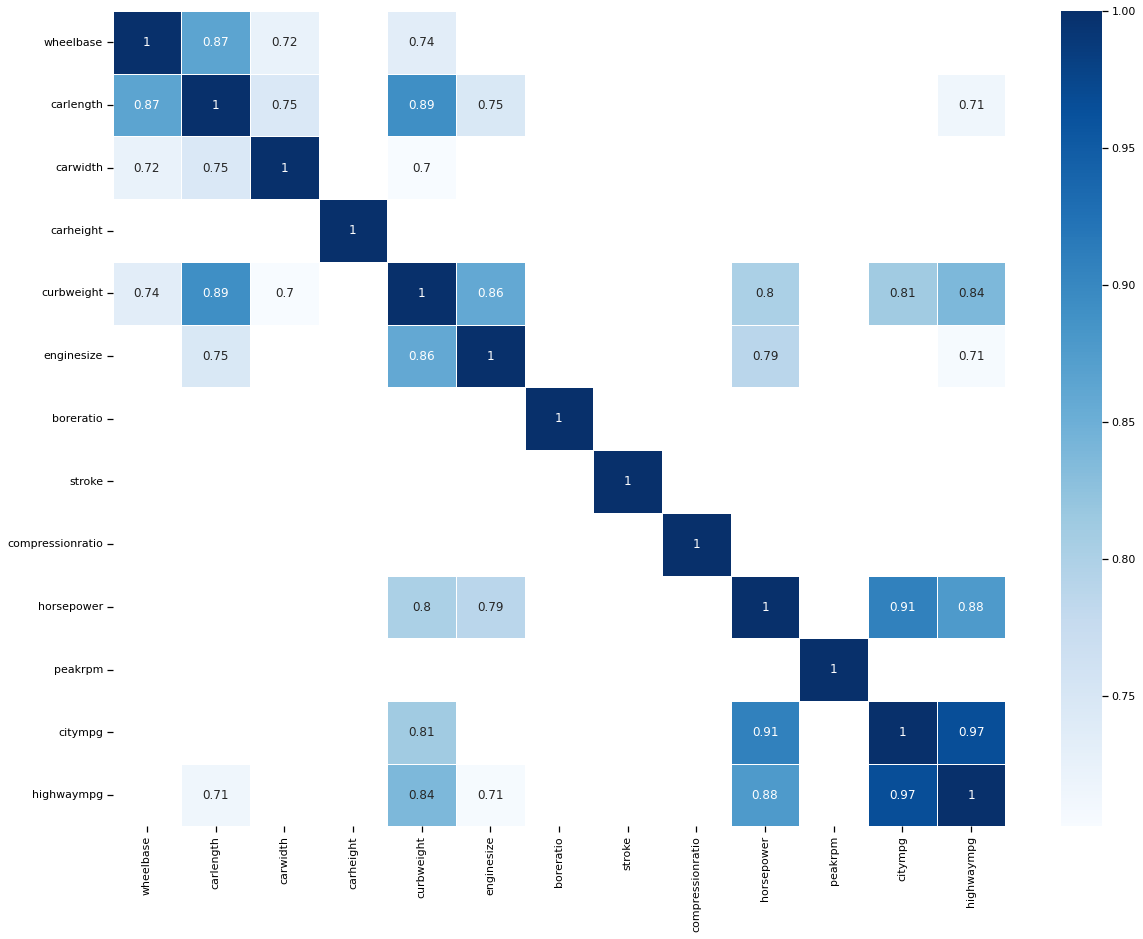

In [52]:
plt.figure(figsize=(20,15))
corr = df_num.corr().abs()
mask = corr < 0.7
sns.heatmap(corr, annot=True, mask=mask ,cmap='Blues', linewidth=1)

<a id='5.2.3'></a>
#### __5.2.3 Numerical Values Variance Inflation Factor__

In [53]:
vif = pd.Series([variance_inflation_factor(df_num, i) for i in range(len(df_num.columns))], index=df_num.columns)
vif

wheelbase           5.518791e+00
carlength           9.877461e+00
carwidth            4.786559e-10
carheight           2.162565e+00
curbweight          1.543603e+01
enginesize          6.365395e+00
boreratio           2.226758e+00
stroke              1.307847e+00
compressionratio    1.924986e+00
horsepower          1.164762e+01
peakrpm             2.266573e+00
citympg             2.446619e+01
highwaympg          1.876070e+01
dtype: float64

In [54]:
df_num1 = df_num.copy()

<a id='5.2.4'></a>
#### __5.2.4 Numerical Features Engineering__

In [55]:
df_num1['avg_mpg'] = (df_num1.highwaympg + df_num1.citympg)/2
df_num1['car_density'] = df_num1.curbweight/(df_num1.carlength*df_num1.carwidth*df_num1.carheight)
df_num1.drop(['highwaympg', 'citympg', 'carwidth', 'carlength','carheight','curbweight', 'wheelbase'], axis=1, inplace=True)

<a id='5.2.5'></a>
#### __5.2.5 Altered Numerical Values Variance Inflation Factor__

In [56]:
vif1 = pd.Series([variance_inflation_factor(df_num1, i) for i in range(len(df_num1.columns))], index=df_num1.columns)
vif1

enginesize          832503.815802
boreratio              205.744920
stroke                  21.445975
compressionratio    639077.967840
horsepower           57892.925002
peakrpm                427.452836
avg_mpg                874.875105
car_density           1169.623124
dtype: float64

<a id='5.2.6'></a>
#### __5.2.6 Altered Numerical Data Correlation__

<AxesSubplot:>

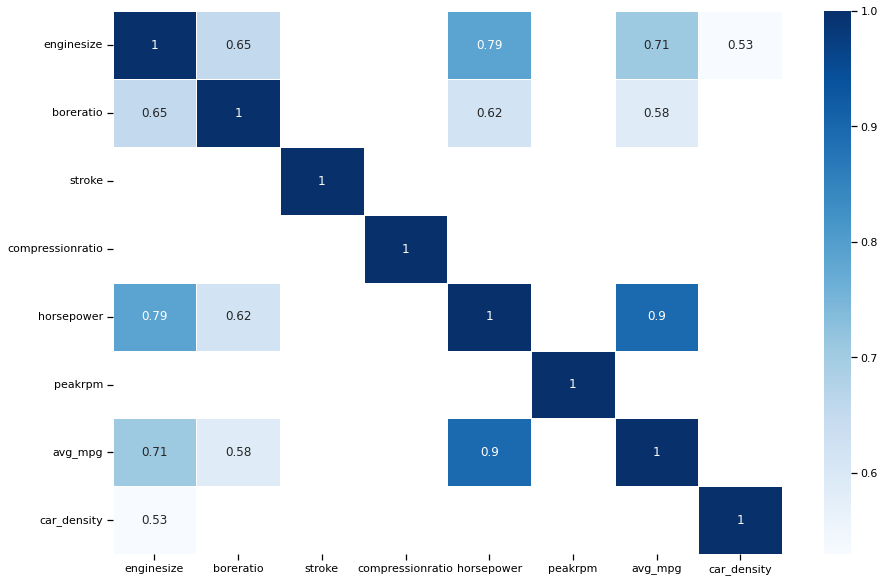

In [57]:
plt.figure(figsize=(15,10))
corr = df_num1.corr().abs()
mask = corr < 0.5
sns.heatmap(corr, annot=True, mask=mask ,cmap='Blues', linewidth=1)

<a id='6'></a>
## __6. Model Prediction__

In [58]:
df_m = pd.concat([df_cat, df_num1], axis=1)
df_m = df_m.astype('float64')

In [59]:
train_x, test_x, train_y, test_y = train_test_split(df_m, y, test_size=0.2, random_state=0)

In [60]:
df_m1 = pd.concat([df_cat, df_num], axis=1)

In [61]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(df_m1, y, test_size=0.2, random_state=0)

In [62]:
kf = KFold(shuffle=True, n_splits=5, random_state=0)

<a id='6.1'></a>
### __6.1 Linear Regression Model on Altered Dataset__

In [63]:
pipe = Pipeline([('ss', StandardScaler()),('lr', LinearRegression())])
pipe

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

In [64]:
pred = cross_val_predict(pipe, df_m1, y, cv = kf)
r2_score(y, pred)

-5.527069819331899e+23

In [65]:
pred = cross_val_predict(pipe, df_m, y, cv = kf)
r2_score(y, pred)

-5.1007488639285764e+19

THe <mark>R2 score</mark> of both models are negative showing that the model is overfitted.

<a id='6.2'></a>
### __6.2 Lasso Regression Model on Both Dataset__

In [66]:
pipe_las = Pipeline([('pf', PolynomialFeatures(include_bias=False)),('ss', StandardScaler()),('las', Lasso())])
params_las={'pf__degree':[1,2,3], 'las__alpha':np.geomspace(1e-9, 1e2, num=15)}
grid = GridSearchCV(pipe_las, params_las, cv=kf)

In [67]:
grid.fit(df_m1, y)
grid.best_score_,grid.best_params_

(0.8929298020688881, {'las__alpha': 5.1794746792312125e-05, 'pf__degree': 3})

The <mark>R2 score</mark> is 89.3%

In [68]:
best_est_las = Pipeline([('pf', PolynomialFeatures(degree=3, include_bias=False)),('ss', StandardScaler()),('las', Lasso(alpha=5.1794746792312125e-05))])
best_est_las.fit(train_x1,train_y1)
pred = best_est_las.predict(test_x1)
df_imp_las= pd.DataFrame({'features':best_est_las.named_steps['pf'].get_feature_names(), 'score':best_est_las.named_steps['las'].coef_})

df_imp_las.sort_values('score', ascending=False, inplace=True)
df_imp_las.head(10)

,features,score
37658,x50^2 x54,0.000452
37523,x47 x55^2,0.000329
1840,x0^2 x11,0.000082
31833,x26 x57 x58,0.000046
37721,x51 x54 x55,0.000044
31834,x26 x58^2,0.000040
37667,x50 x51 x55,0.000034
37659,x50^2 x55,0.000033
4747,x1 x25 x57,0.000029
37785,x54^2 x55,0.000027


<AxesSubplot:xlabel='price', ylabel='Density'>

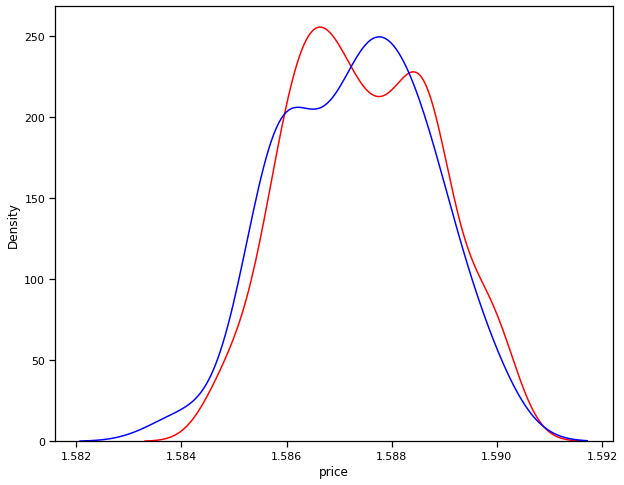

In [69]:
plt.figure(figsize=(10,8))
sns.set_context("notebook")
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [70]:
grid.fit(df_m, y)
grid.best_score_,grid.best_params_

(0.8767280972479755, {'las__alpha': 5.1794746792312125e-05, 'pf__degree': 3})

The <mark>R2 score</mark> is 87.7%

In [71]:
best_est_las = Pipeline([('pf', PolynomialFeatures(degree=3, include_bias=False)),('ss', StandardScaler()),('las', Lasso(alpha=5.1794746792312125e-05))])
best_est_las.fit(train_x,train_y)
pred = best_est_las.predict(test_x)

df_imp_las= pd.DataFrame({'features':best_est_las.named_steps['pf'].get_feature_names(), 'score':best_est_las.named_steps['las'].coef_})

df_imp_las.sort_values('score', ascending=False, inplace=True)
df_imp_las.head(10)

,features,score
29225,x49^2 x50,0.000379
29160,x46 x49^2,0.000286
29161,x46 x49 x50,0.000068
25602,x26 x52^2,0.000060
1539,x0^3,0.000045
14856,x10 x33 x51,0.000033
7620,x4 x14 x20,0.000026
4561,x2 x4 x7,0.000025
4814,x2 x9 x25,0.000016
25982,x27 x53^2,0.000014


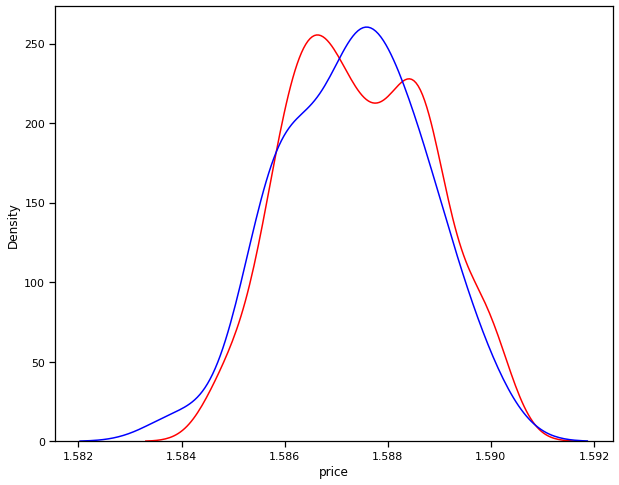

In [72]:
plt.figure(figsize=(10,8))
sns.set_context("notebook")
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values" , ax=ax1);

<a id='6.3'></a>
### __6.3 Ridge Regression Model on Both Dataset__

In [73]:
pipe_ridge = Pipeline([('pf', PolynomialFeatures()),('ss', StandardScaler()),('ridge', Ridge())])
params_ridge = {'pf__degree':[1,2,3], 'ridge__alpha':np.geomspace(1e-9, 1e4, num=15)}

grid_ridge = GridSearchCV(pipe_ridge, params_ridge, cv=kf)

In [74]:
grid_ridge.fit(df_m1, y)
grid_ridge.best_score_,grid_ridge.best_params_

(0.8881424855140327, {'pf__degree': 1, 'ridge__alpha': 138.9495494373136})

The <mark>R2 score</mark> is 88.8%

In [75]:
best_est_rdg = Pipeline([('ss', StandardScaler()), ('ridge', Ridge(alpha=138.9495494373136))])
best_est_rdg.fit(train_x1,train_y1)
pred = best_est_rdg.predict(test_x1)

df_imp_rdg= pd.DataFrame({'features':df_m1.columns.values, 'score':best_est_rdg.named_steps['ridge'].coef_})

df_imp_rdg.sort_values('score', ascending=False, inplace=True)
df_imp_rdg.head(10)

,features,score
50,curbweight,0.000145
55,horsepower,0.000125
51,enginesize,0.000113
47,carlength,0.000112
22,fuelsystem_mpfi,0.000079
10,drivewheel_rwd,0.000078
26,car_brand_bmw,0.000074
11,enginelocation_rear,0.000067
39,car_brand_porsche,0.000067
4,aspiration_turbo,0.000061


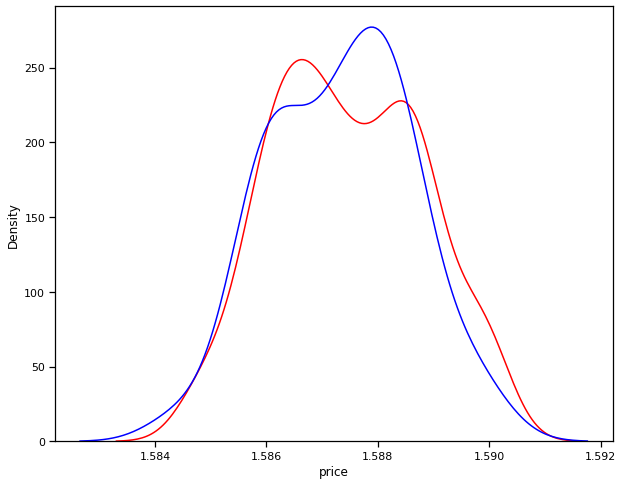

In [76]:
plt.figure(figsize=(10,8))
sns.set_context("notebook")
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values" , ax=ax1);

In [77]:
grid_ridge.fit(df_m, y)
grid_ridge.best_score_,grid_ridge.best_params_

(0.8715381739071952, {'pf__degree': 1, 'ridge__alpha': 138.9495494373136})

The <mark>R2 score</mark> is 87.2%

In [78]:
best_est_rdg = Pipeline([('ss', StandardScaler()), ('ridge', Ridge(alpha=138.9495))])
best_est_rdg.fit(train_x,train_y)
pred = best_est_rdg.predict(test_x)

df_imp_rdg= pd.DataFrame({'features':df_m.columns.values, 'score':best_est_rdg.named_steps['ridge'].coef_})

df_imp_rdg.sort_values('score', ascending=False, inplace=True)
df_imp_rdg.head(10)

,features,score
50,horsepower,0.000167
46,enginesize,0.000154
22,fuelsystem_mpfi,0.000099
10,drivewheel_rwd,0.000098
47,boreratio,0.000085
2,cylindernumber,0.000078
26,car_brand_bmw,0.000077
27,car_brand_buick,0.000073
4,aspiration_turbo,0.000073
25,car_brand_audi,0.000067


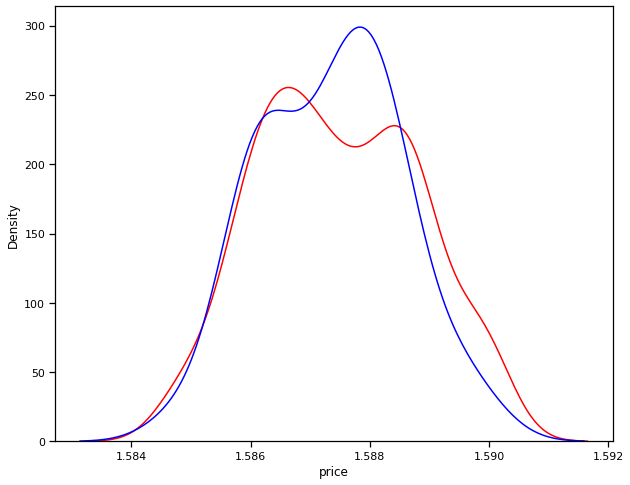

In [79]:
plt.figure(figsize=(10,8))
sns.set_context("notebook")
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values" , ax=ax1);

<a id='6.4'></a>
### __6.4 ElasticNet Regression Model on Both Dataset__

In [80]:
pipe_en = Pipeline([('pf', PolynomialFeatures()),('ss', StandardScaler()),('en', ElasticNet())])
param_en = {
    "pf__degree": [1, 2,3],
    "en__alpha":np.geomspace(1e-9, 1e2, num=15),
    "en__l1_ratio":[0.1,0.25,0.5,0.75,0.9],
}

grid_en = GridSearchCV(pipe_en, param_en, cv=kf)

In [81]:
grid_en.fit(df_m1, y)
grid_en.best_score_,grid_en.best_params_

(0.89728939707806,
 {'en__alpha': 0.00031622776601683794, 'en__l1_ratio': 0.1, 'pf__degree': 2})

The <mark>R2 score</mark> is 89.7%

In [82]:
best_est_en = Pipeline([('pf', PolynomialFeatures(degree= 2)),('ss', StandardScaler()),('en', ElasticNet(alpha=0.000316, l1_ratio=0.1))])
best_est_en.fit(train_x1,train_y1)
pred = best_est_en.predict(test_x1)

df_imp_en= pd.DataFrame({'features':best_est_en.named_steps['pf'].get_feature_names(), 'score':best_est_en.named_steps['en'].coef_})

df_imp_en.sort_values('score', ascending=False, inplace=True)
df_imp_en.head(10)

,features,score
1743,x46 x50,0.000250
1798,x51 x55,0.000232
1789,x50 x54,0.000215
1760,x47 x55,0.000177
71,x0 x11,0.000080
1301,x26 x58,0.000064
51,x50,0.000055
1300,x26 x57,0.000054
143,x1 x25,0.000046
1766,x48 x50,0.000043


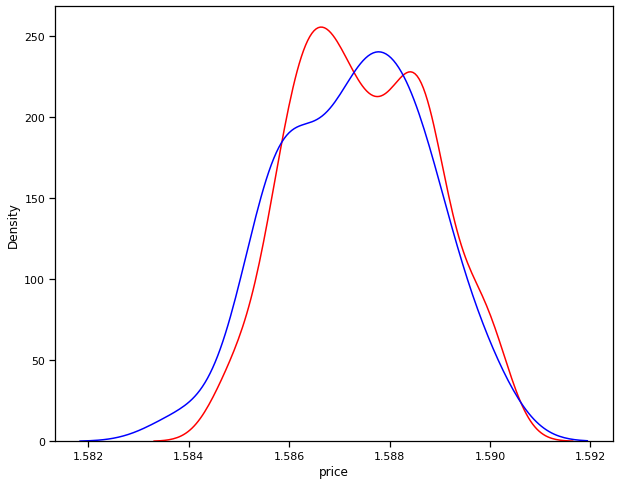

In [83]:
plt.figure(figsize=(10,8))
sns.set_context("notebook")
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values" , ax=ax1);

In [84]:
grid_en.fit(df_m, y)
grid_en.best_score_,grid_en.best_params_

(0.8781766724947371,
 {'en__alpha': 0.00031622776601683794, 'en__l1_ratio': 0.1, 'pf__degree': 3})

The <mark>R2 score</mark> is 87.8%

In [85]:
best_est_en = Pipeline([('pf', PolynomialFeatures(degree= 3)),('ss', StandardScaler()),('en', ElasticNet(alpha=0.000316, l1_ratio=0.1))])
best_est_en.fit(train_x,train_y)
pred = best_est_en.predict(test_x)

df_imp_en= pd.DataFrame({'features':best_est_en.named_steps['pf'].get_feature_names(), 'score':best_est_en.named_steps['en'].coef_})

df_imp_en.sort_values('score', ascending=False, inplace=True)
df_imp_en.head(10)

,features,score
29161,x46 x49^2,0.000302
29226,x49^2 x50,0.000184
29162,x46 x49 x50,0.000147
29144,x46^2 x50,0.000111
25603,x26 x52^2,0.000081
1540,x0^3,0.000068
14857,x10 x33 x51,0.000064
7621,x4 x14 x20,0.000044
3957,x1 x22 x51,0.000026
4815,x2 x9 x25,0.000022


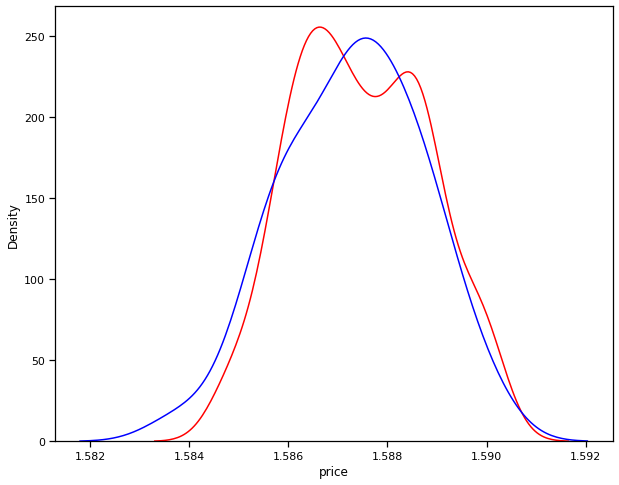

In [86]:
plt.figure(figsize=(10,8))
sns.set_context("notebook")
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values" , ax=ax1);

If you liked this Notebook, upvote.  
If you have any feedback, feel free to comment.

Author: Mostafa Hafez  
linkedin: /in/mostafa-hafez0  
github: /Mostafa-H25

Date: 03-12-2022